In [135]:
import os
import pandas as pd
import numpy as np
import csv
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from unets import unet

In [136]:
dataset = np.load('dataset.npy',allow_pickle='TRUE').item()
print(dataset)

{'VIGNET_NOISELESS': array([[[ 1.14056972e-10,  1.37874878e-10,  1.93644781e-10, ...,
          3.31085936e-09,  2.54950794e-09,  1.92872673e-09],
        [ 1.30046737e-10,  1.61991753e-10,  2.24238544e-10, ...,
          3.77097731e-09,  2.86877300e-09,  2.15203055e-09],
        [ 1.64487035e-10,  2.09965170e-10,  2.61423716e-10, ...,
          4.26237357e-09,  3.21767324e-09,  2.39624098e-09],
        ...,
        [ 2.33488473e-09,  3.19044724e-09,  4.27588853e-09, ...,
          3.18391036e-10,  2.48702503e-10,  1.91640911e-10],
        [ 2.12533946e-09,  2.87357071e-09,  3.82388876e-09, ...,
          2.77176893e-10,  2.08873779e-10,  1.48946536e-10],
        [ 1.92766181e-09,  2.58242649e-09,  3.39665185e-09, ...,
          2.50455684e-10,  1.71337319e-10,  1.25548419e-10]],

       [[ 1.65951322e-10,  1.17755014e-10,  1.24875152e-10, ...,
          2.02208250e-10,  1.98865549e-10,  1.62216310e-10],
        [ 2.02737743e-10,  1.58503904e-10,  1.25615032e-10, ...,
          2.47275

In [137]:
dataset['VIGNET_NOISELESS'].shape

(1000, 51, 51)

In [138]:
im_train, im_val, target_train, target_val = train_test_split(dataset['VIGNETS_WITH_NOISE'], dataset['VIGNET_NOISELESS'],
                                                              test_size=0.1, random_state=7)

im_train = tf.reshape(tf.convert_to_tensor(im_train), [900, 51, 51, 1])/255
target_train = tf.reshape(tf.convert_to_tensor(target_train), [900, 51, 51, 1])
im_val = tf.reshape(tf.convert_to_tensor(im_val), [100, 51, 51, 1])/255
target_val = tf.reshape(tf.convert_to_tensor(target_val), [100, 51, 51, 1])

In [139]:
n_channels=1
model=unet(input_size=(51,51,n_channels), lr=1e-3, bn=True, layers_n_channels=1)

Epoch 1/30
50/50 [==============================] - 2s 27ms/step - loss: 1.2408e-05 - keras_psnr: 49.3326 - keras_ssim: 0.9598 - val_loss: 1.1058e-05 - val_keras_psnr: 49.7644 - val_keras_ssim: 0.9652
Epoch 2/30
50/50 [==============================] - 1s 22ms/step - loss: 9.2511e-06 - keras_psnr: 50.6093 - keras_ssim: 0.9761 - val_loss: 1.1709e-05 - val_keras_psnr: 49.4927 - val_keras_ssim: 0.9582
Epoch 3/30
50/50 [==============================] - 1s 22ms/step - loss: 9.4357e-06 - keras_psnr: 50.5257 - keras_ssim: 0.9777 - val_loss: 1.3211e-05 - val_keras_psnr: 48.9272 - val_keras_ssim: 0.9427
Epoch 4/30
50/50 [==============================] - 1s 22ms/step - loss: 7.8764e-06 - keras_psnr: 51.3129 - keras_ssim: 0.9812 - val_loss: 1.4837e-05 - val_keras_psnr: 48.3897 - val_keras_ssim: 0.9260
Epoch 5/30
50/50 [==============================] - 1s 22ms/step - loss: 5.5586e-06 - keras_psnr: 52.8514 - keras_ssim: 0.9869 - val_loss: 1.5899e-05 - val_keras_psnr: 48.0677 - val_keras_ssim: 0.

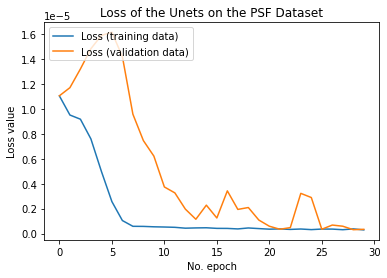

In [140]:
history = model.fit(im_train, target_train, validation_data=(im_val, target_val), batch_size=4, 
           epochs=30, steps_per_epoch=50)

plt.plot(history.history['loss'], label='Loss (training data)')
plt.plot(history.history['val_loss'], label='Loss (validation data)')
plt.title('Loss of the Unets on the PSF Dataset')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

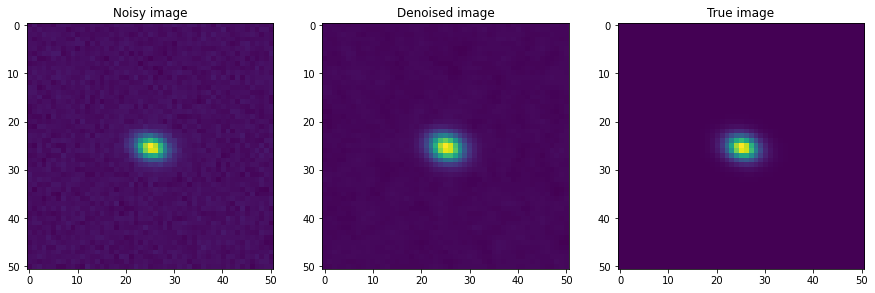

In [141]:
one_star_noiseless = model.predict(im_val)[99,:,:]
one_star_noise = im_val[99,:,:]
one_star_truth = target_val[99,:,:]

fig = plt.figure(num=0, figsize=(15,15))
ax1 = fig.add_subplot(1,3,1)
ax1.title.set_text('Noisy image')
im1 = ax1.imshow(one_star_noise, interpolation='None')
ax2 = fig.add_subplot(1,3,2)
im2 = ax2.imshow(one_star_noiseless, interpolation='None')
ax2.title.set_text('Denoised image')
ax3 = fig.add_subplot(1,3,3)
im3 = ax3.imshow(one_star_truth, interpolation='None')
ax3.title.set_text('True image')
